In [1]:
from math import dist
import numpy as np
import pandas as pd
import os
from pyparsing import col

from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors

import csv
import seaborn as sns
from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

Axes3D

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

3000
100000


In [2]:
directory = os.getcwd()

print(directory)

/Users/sweintraub/Documents/WPI/Young/data/comparative_dh/unsupervisedClustering


In [3]:
data = pd.read_csv('../output/sigDEGS_dh.csv')
# data.rename(columns = {data.columns[0]: "proteinId"}, inplace = True)
print(data)

      Unnamed: 0          proteinId         cont       cont.1       cont.2  \
0              1     jgi.p|Debha1|1  1553.101319  1258.501640  1634.844274   
1              2    jgi.p|Debha1|10    91.358901   114.409240    87.723351   
2              3  jgi.p|Debha1|1002     6.300614     8.446320     9.968563   
3              4  jgi.p|Debha1|1003   253.074657   480.672377   223.295803   
4              5  jgi.p|Debha1|1009    60.905934    74.481183    70.776795   
...          ...                ...          ...          ...          ...   
2349        2350   jgi.p|Debha1|983  2953.937803  4688.475297  3009.509064   
2350        2351    jgi.p|Debha1|99    58.805729    65.267016    46.852244   
2351        2352   jgi.p|Debha1|992   349.684070   321.727997   271.144904   
2352        2353   jgi.p|Debha1|993   236.273020   488.350850   252.204635   
2353        2354   jgi.p|Debha1|996   140.713710   133.605421   177.440415   

             lowN       lowN.1         salt      salt.1       s

In [4]:
print(data.shape)

(2354, 13)


In [5]:
features = ['cont', 'cont.1', 'cont.2', 'lowN', 'lowN.1', 'salt', 'salt.1', 'salt.2', 'lowFE', 'lowFE.1', 'lowFE.2']

counts = data.loc[:,features].values
proteinId = data.loc[:,['proteinId']]

print(counts.shape)
print(proteinId.shape)

(2354, 11)
(2354, 1)


In [6]:
counts

array([[1553.10131893, 1258.50163955, 1634.84427445, ..., 1425.81468665,
        1622.83686394, 1752.09990209],
       [  91.35890111,  114.40923996,   87.72335131, ...,   77.6340002 ,
          92.55026723,   99.17546616],
       [   6.30061387,    8.44631973,    9.96856265, ...,    5.6805366 ,
           8.24705352,    5.83385095],
       ...,
       [ 349.68406978,  321.72799693,  271.14490406, ...,  356.92704971,
         365.61937251,  402.53571557],
       [ 236.27302012,  488.35084976,  252.20463502, ...,  719.53463603,
         724.82437006,  721.45290086],
       [ 140.71370976,  133.60542116,  177.44041515, ...,  184.61743951,
         188.76589157,  198.35093231]])

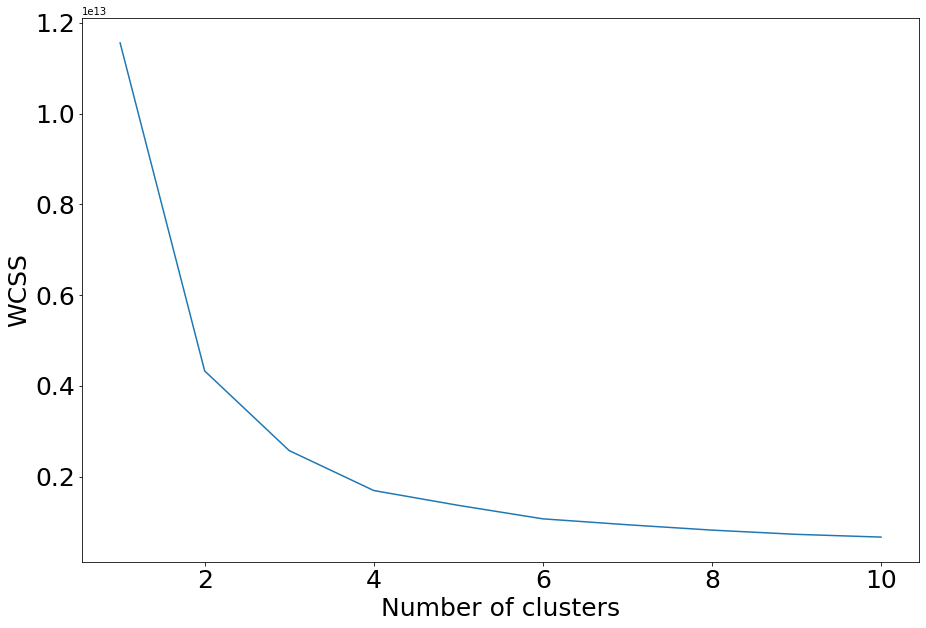

In [7]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++", random_state=3009)
   model.fit(counts)
   wcss.append(model.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters',fontsize=25)
plt.ylabel('WCSS',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('WCSS_dh.pdf')

 It looks like we can do 4-8 clusters

In [8]:
pca = PCA(2)
counts_transformed = pca.fit_transform(counts)

<BarContainer object of 2 artists>

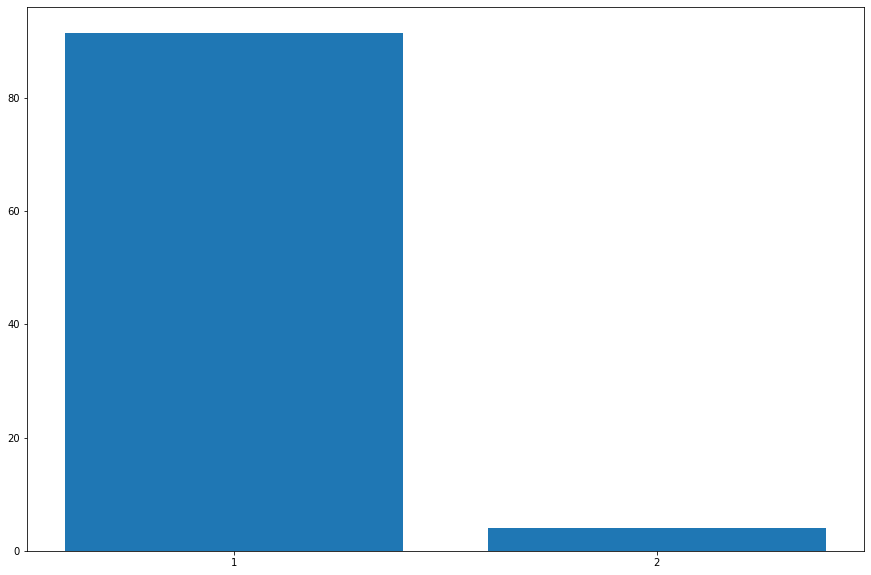

In [9]:
plt.figure(figsize=(15,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(counts) for counts in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)

In [10]:
df = data.set_index('proteinId')
# df

In [11]:
conditions = list(df.columns.values) 

# conditions

In [12]:
proteinIds = list(df.index)
# proteinIds

 # PCA by proteinID

Cluster 0 has 2195 genes
Cluster 1 has 40 genes
Cluster 2 has 5 genes
Cluster 3 has 114 genes


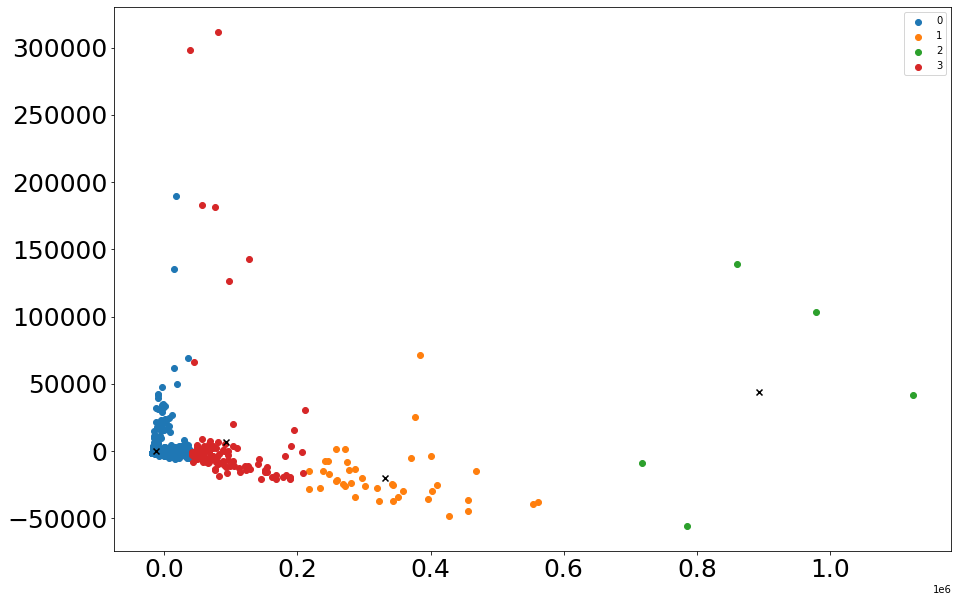

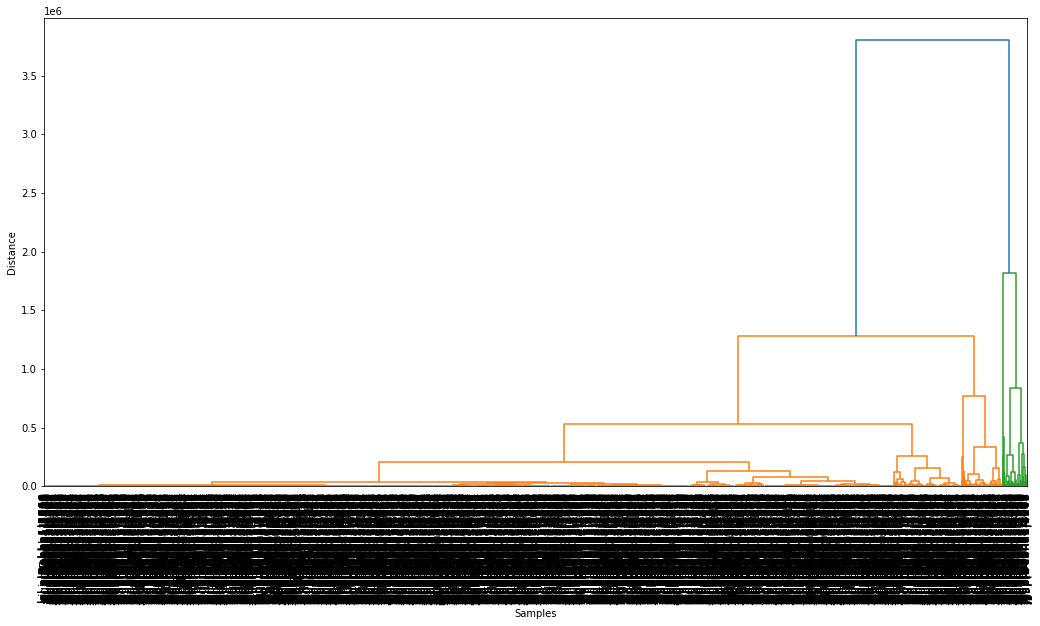

In [13]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan")
label = model.fit_predict(counts_transformed)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(counts_transformed[label == i , 0] , counts_transformed[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()


counts = df.values
cluster_samples = linkage(counts_transformed, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster_samples, 
    leaf_rotation=90., 
    leaf_font_size=12., 
    labels=proteinIds, 
    )

plt.savefig('dendrogram_samples_dh_n4.pdf')

cluster0 = counts_transformed[label == 0]
print("Cluster 0 has", len(cluster0), "genes", sep = " ")

cluster1 = counts_transformed[label == 1]
print("Cluster 1 has", len(cluster1), "genes", sep = " ")

cluster2 = counts_transformed[label == 2]
print("Cluster 2 has", len(cluster2), "genes", sep = " ")

cluster3 = counts_transformed[label == 3]
print("Cluster 3 has", len(cluster3), "genes", sep = " ")

Cluster 4 has 1995 genes
Cluster 5 has 167 genes
Cluster 6 has 31 genes
Cluster 7 has 2 genes


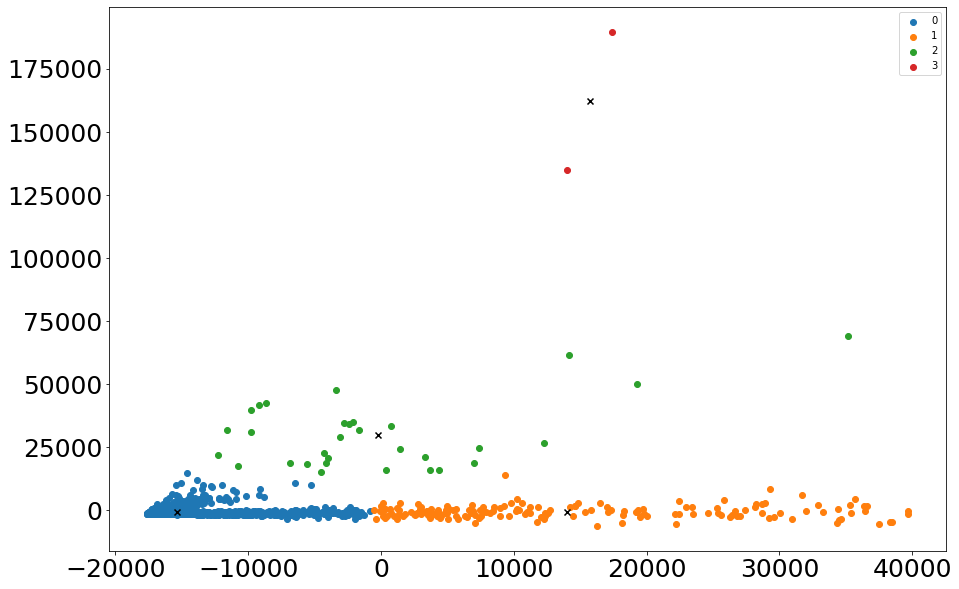

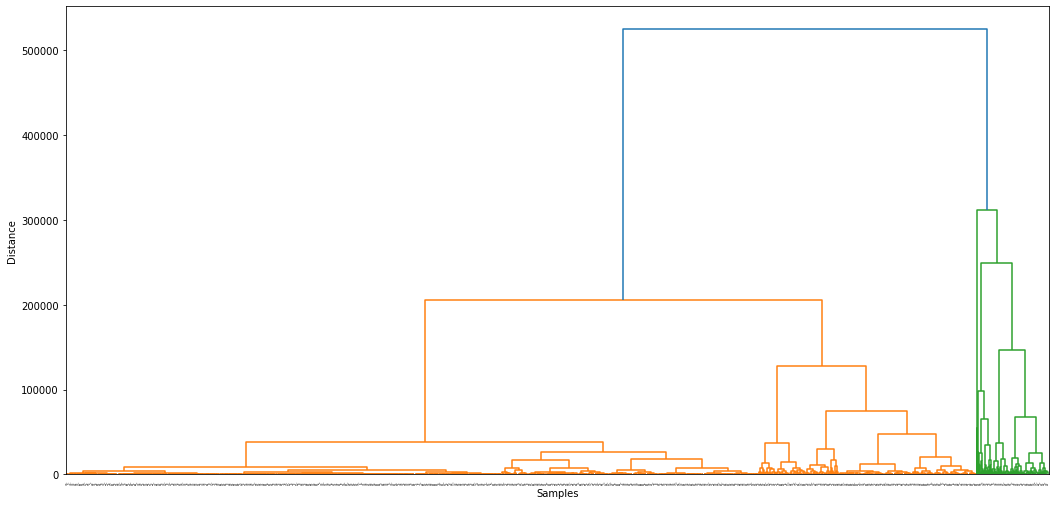

In [14]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster0)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster0[label == i , 0] , cluster0[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()
plt.savefig('kmeans_elkan_4_dh.pdf')

cluster0_samples = linkage(cluster0, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster0_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram0_4_samples_dh.pdf')

cluster4 = cluster0[label == 0]
print("Cluster 4 has", len(cluster4), "genes", sep = " ")

cluster5 = cluster0[label == 1]
print("Cluster 5 has", len(cluster5), "genes", sep = " ")

cluster6 = cluster0[label == 2]
print("Cluster 6 has", len(cluster6), "genes", sep = " ")

cluster7 = cluster0[label == 3]
print("Cluster 7 has", len(cluster7), "genes", sep = " ")

Cluster 8 has 76 genes
Cluster 9 has 127 genes
Cluster 10 has 1497 genes
Cluster 11 has 295 genes


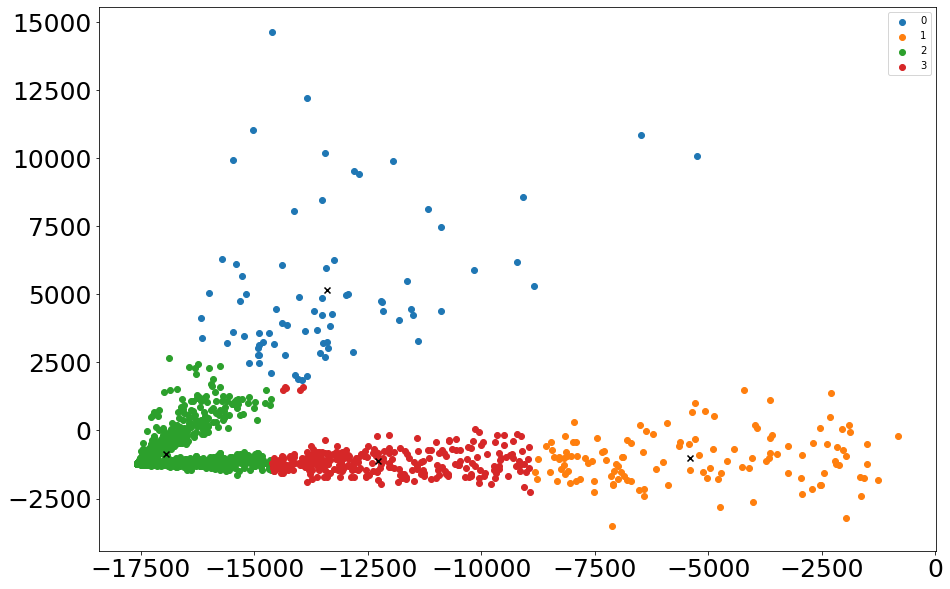

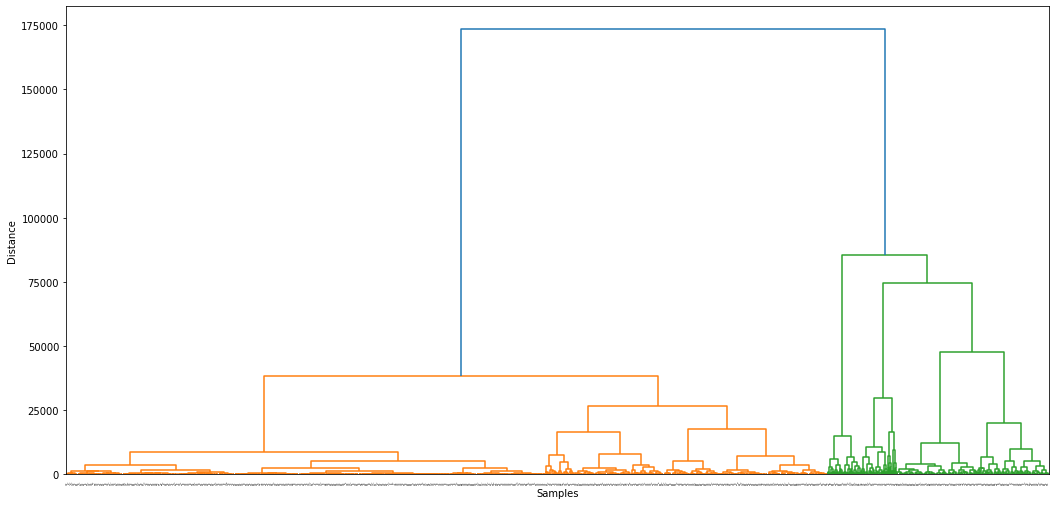

In [15]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster4)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster4[label == i , 0] , cluster4[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

cluster4_samples = linkage(cluster4, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster4_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram4_4_samples_dh.pdf')

cluster8 = cluster4[label == 0]
print("Cluster 8 has", len(cluster8), "genes", sep = " ")

cluster9 = cluster4[label == 1]
print("Cluster 9 has", len(cluster9), "genes", sep = " ")

cluster10 = cluster4[label == 2]
print("Cluster 10 has", len(cluster10), "genes", sep = " ")

cluster11 = cluster4[label == 3]
print("Cluster 11 has", len(cluster11), "genes", sep = " ")

 # Kernel PCA comparison

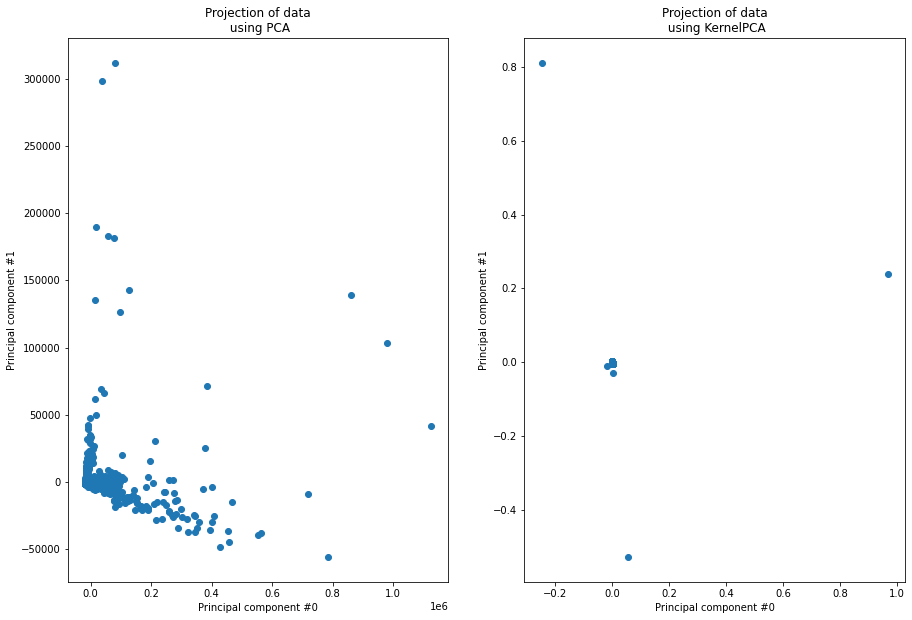

In [16]:
pca = PCA(n_components=2)
rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=3009
)

counts_pca = pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(15,10)
)

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA")

 Polynomial KPCA

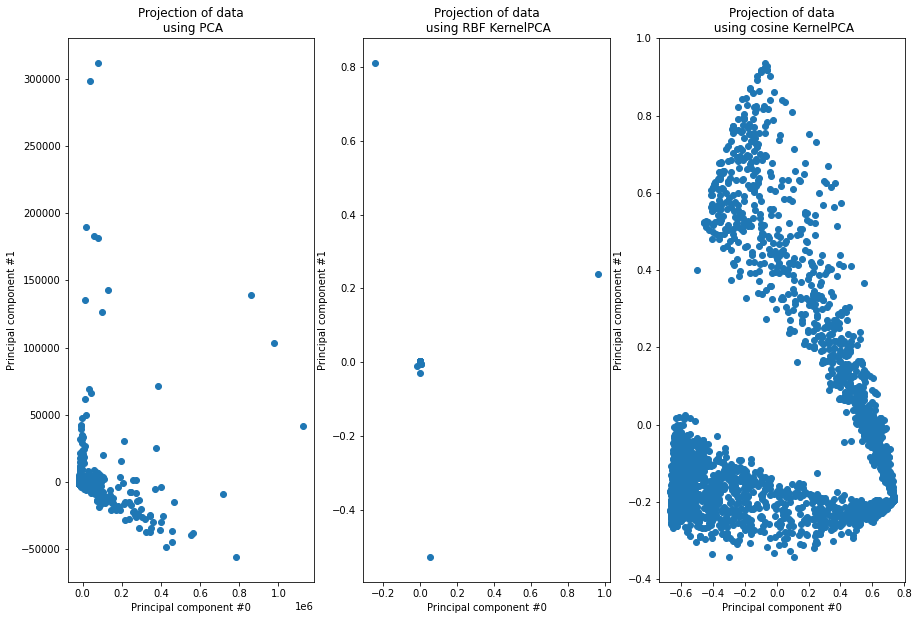

In [17]:
pca = PCA(n_components=2)

# lin_kernel_pca = KernelPCA(
#     n_components=None, kernel="linear", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

# sig_kernel_pca = KernelPCA(
#     n_components=None, kernel="sigmoid", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

cos_kernel_pca = KernelPCA(
    n_components=None, kernel="cosine", gamma=10, fit_inverse_transform=True, alpha=0.1
)

rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

counts_pca = pca.fit(counts).transform(counts)
# lin_counts_kernel_pca = lin_kernel_pca.fit(counts).transform(counts)
# sig_counts_kernel_pca = sig_kernel_pca.fit(counts).transform(counts)
cos_counts_kernel_pca = cos_kernel_pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax, cos_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(15,10) )

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using RBF KernelPCA")

# sig_counts_kernel_pca_proj_ax.scatter(sig_counts_kernel_pca[:, 0], sig_counts_kernel_pca[:, 1])
# sig_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# sig_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = sig_counts_kernel_pca_proj_ax.set_title("Projection of data\n using Sigmoid KernelPCA")

# lin_counts_kernel_pca_proj_ax.scatter(lin_counts_kernel_pca[:, 0], lin_counts_kernel_pca[:, 1])
# lin_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# lin_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = lin_counts_kernel_pca_proj_ax.set_title("Projection of data\n using linear KernelPCA")

cos_counts_kernel_pca_proj_ax.scatter(cos_counts_kernel_pca[:, 0], cos_counts_kernel_pca[:, 1])
cos_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
cos_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = cos_counts_kernel_pca_proj_ax.set_title("Projection of data\n using cosine KernelPCA")

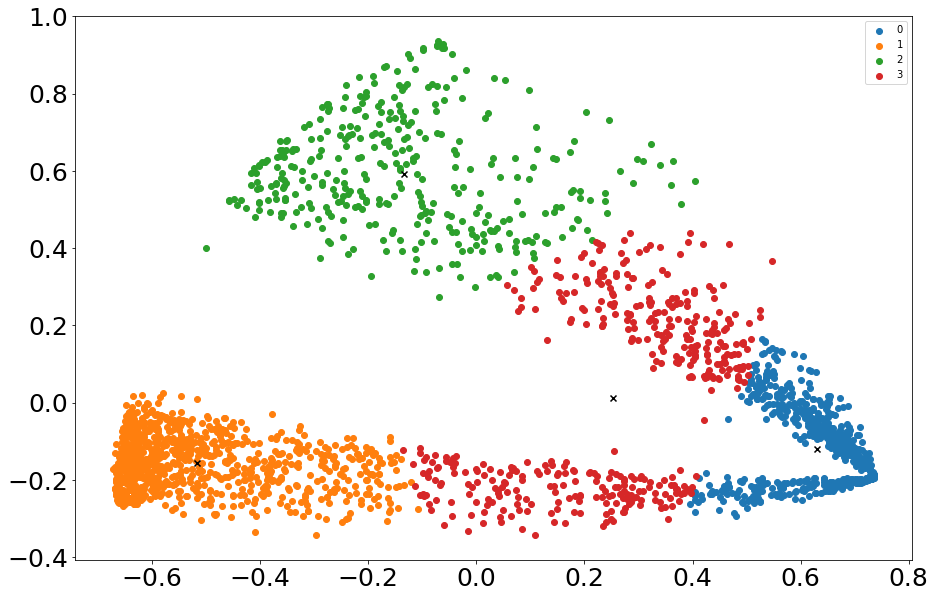

In [18]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="full", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

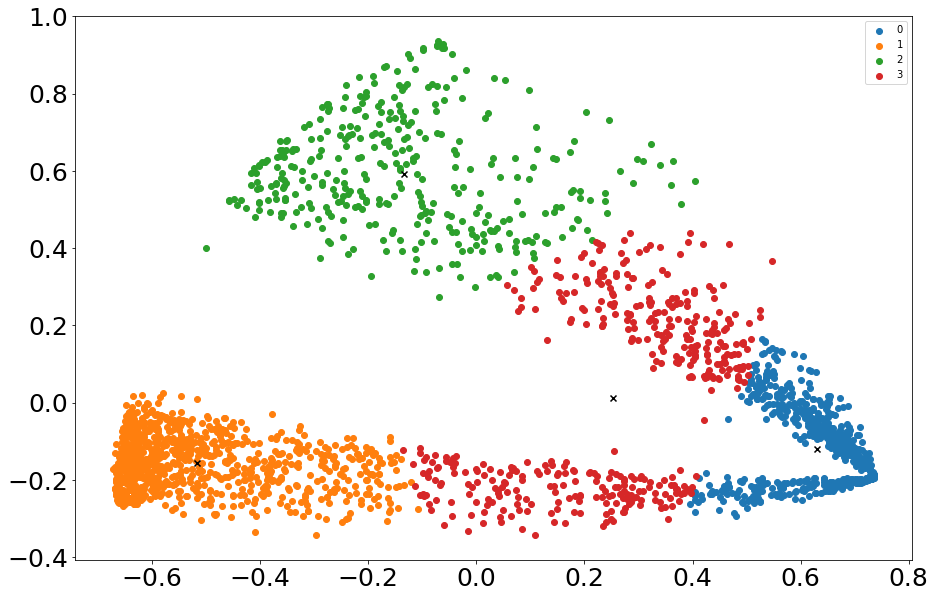

In [19]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

plt.savefig('kmeans_elkan_4_kpca_cosine_dh.pdf')

pd.DataFrame(centers).to_csv("cos_4_centers_dh.csv", index=True)

 ### T-SNE

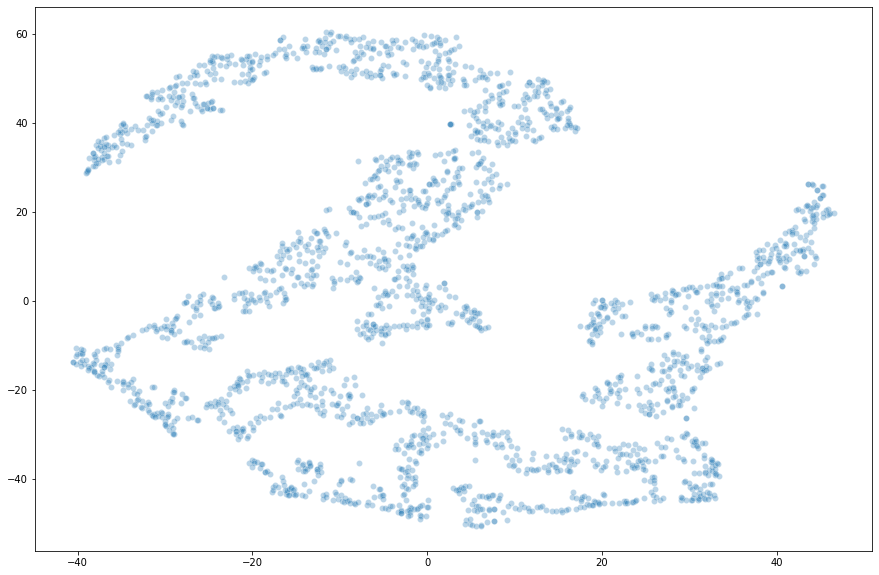

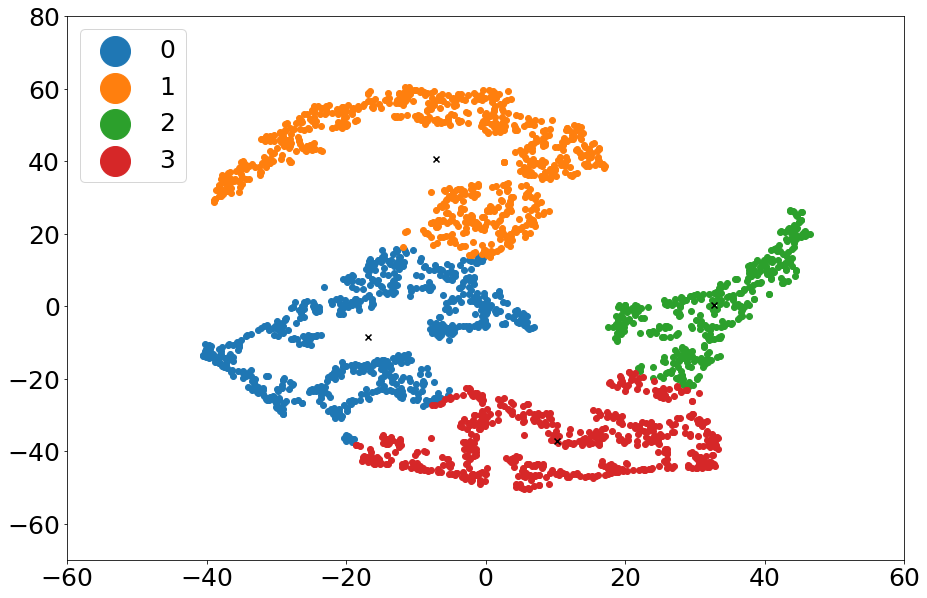

In [20]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=3009).fit_transform(counts)
tsne.shape

plt.figure(figsize=(15,10))
sns.scatterplot(
    x=tsne[:,0], y=tsne[:,1],
    # hue="y",
    palette=sns.color_palette("hls", 10),
    data=counts,
    legend="full",
    alpha=0.3
)
plt.savefig('tsne_dh.pdf')

model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(tsne)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(tsne[label == i , 0] , tsne[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xlim([-60,60])
plt.ylim([-70,80])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend(fontsize=25, markerscale=5, loc =2)
plt.savefig('kmeans_elkan_4_tsne_dh.pdf')

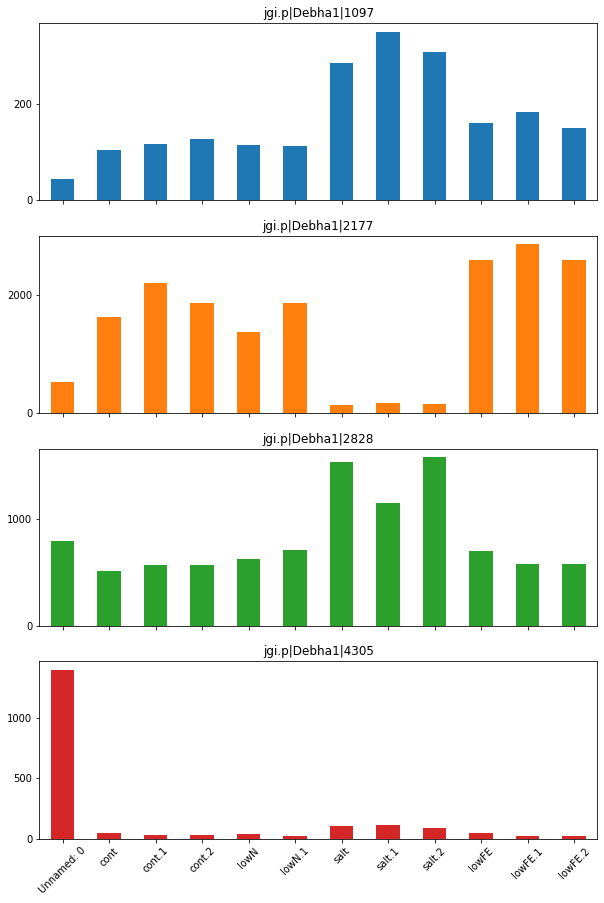

In [21]:
nbrs = NearestNeighbors(n_neighbors=4)
nbrs.fit(tsne)

neighbors_f_id = nbrs.kneighbors_graph(X = centers, n_neighbors = 1).indices

Ncenter0 = df.iloc[[neighbors_f_id[0],]]
Ncenter1 = df.iloc[[neighbors_f_id[1],]]
Ncenter2 = df.iloc[[neighbors_f_id[2],]]
Ncenter3 = df.iloc[[neighbors_f_id[3],]]

Ncenters = [Ncenter0, Ncenter1, Ncenter2, Ncenter3]
Ncenters = pd.concat(Ncenters)

Ncenters_t = np.transpose(Ncenters)
ax = Ncenters_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_Ncenters_t_axis_bar.pdf')

In [22]:
dh_mean_Ncenters_collapsedreps = pd.DataFrame()
dh_mean_Ncenters_collapsedreps.loc[0,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
dh_mean_Ncenters_collapsedreps.loc[0,1] = Ncenters[['lowN', 'lowN.1']].iloc[0].mean()
dh_mean_Ncenters_collapsedreps.loc[0,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
dh_mean_Ncenters_collapsedreps.loc[0,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()

dh_mean_Ncenters_collapsedreps.loc[1,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
dh_mean_Ncenters_collapsedreps.loc[1,1] = Ncenters[['lowN', 'lowN.1']].iloc[1].mean()
dh_mean_Ncenters_collapsedreps.loc[1,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
dh_mean_Ncenters_collapsedreps.loc[1,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()

dh_mean_Ncenters_collapsedreps.loc[2,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
dh_mean_Ncenters_collapsedreps.loc[2,1] = Ncenters[['lowN', 'lowN.1']].iloc[2].mean()
dh_mean_Ncenters_collapsedreps.loc[2,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
dh_mean_Ncenters_collapsedreps.loc[2,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()

dh_mean_Ncenters_collapsedreps.loc[3,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
dh_mean_Ncenters_collapsedreps.loc[3,1] = Ncenters[['lowN', 'lowN.1']].iloc[3].mean()
dh_mean_Ncenters_collapsedreps.loc[3,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
dh_mean_Ncenters_collapsedreps.loc[3,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()

dh_mean_Ncenters_collapsedreps.columns = ['cont','lowN','salt','lowFE']
dh_mean_Ncenters_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
dh_mean_Ncenters_collapsedreps.to_csv("dh_Ncenters_4_collapsedreps.csv", index=True)

dh_mean_Ncenters_collapsedreps

,cont,lowN,salt,lowFE
c0,115.851970,113.900814,313.301839,164.029602
c1,1904.947322,1618.315369,153.854319,2691.525076
c2,551.830477,669.997567,1428.414085,623.531277
c3,36.631189,30.151118,101.238742,29.218863


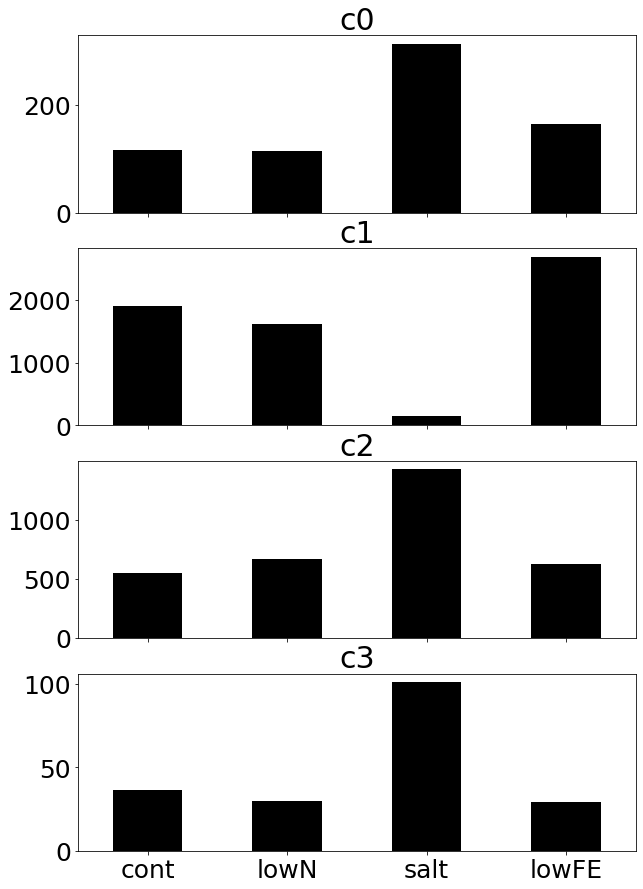

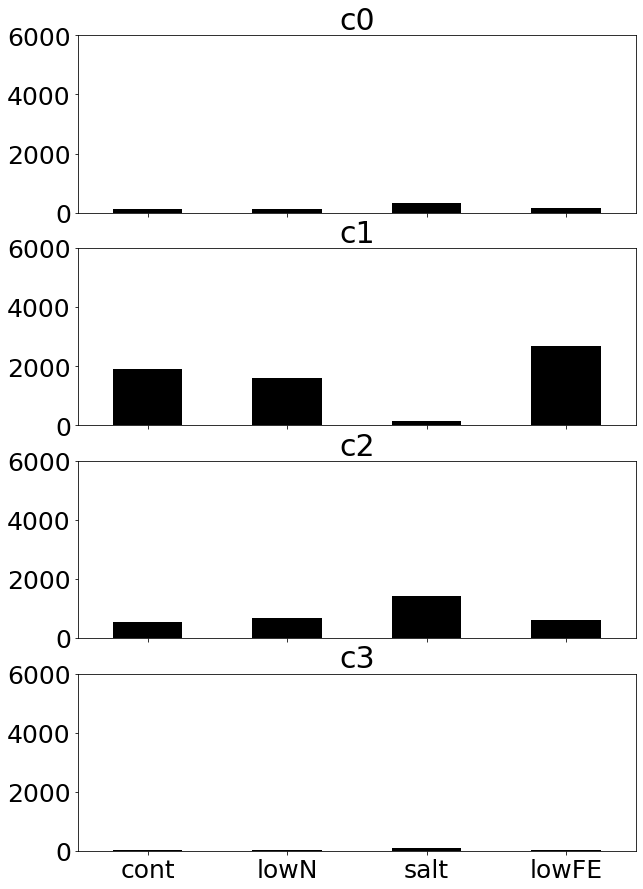

In [23]:
mean_Ncenters_t = np.transpose(dh_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, figsize=(10,15), color = ["black"], linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_Ncenters_t_collapsedreps_bar.pdf')

mean_Ncenters_t = np.transpose(dh_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(0,6000), figsize=(10,15), color = ["black"], linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_Ncenters_t_collapsedreps_bar_6000.pdf')

In [24]:
pd.DataFrame(centers).to_csv("tsne_4_centers_dh.csv", index=True)

In [25]:
cluster0 = pd.DataFrame()
cluster0 = df[model.labels_==0]
cluster0.to_csv("cluster0_4_dh.csv", index=True)
cluster0_mean = pd.DataFrame()
cluster0_mean.loc[0,0] = cluster0['cont'].mean()
cluster0_mean.loc[0,1] = cluster0['cont.1'].mean()
cluster0_mean.loc[0,2] = cluster0['cont.2'].mean()
cluster0_mean.loc[0,3] = cluster0['lowN'].mean()
cluster0_mean.loc[0,4] = cluster0['lowN.1'].mean()
cluster0_mean.loc[0,6] = cluster0['salt'].mean()
cluster0_mean.loc[0,7] = cluster0['salt.1'].mean()
cluster0_mean.loc[0,8] = cluster0['salt.2'].mean()
cluster0_mean.loc[0,9] = cluster0['lowFE'].mean()
cluster0_mean.loc[0,10] = cluster0['lowFE.1'].mean()
cluster0_mean.loc[0,11] = cluster0['lowFE.2'].mean()
# cluster0_mean.to_csv("cluster0_mean_dh.csv", index=True)

cluster1 = pd.DataFrame()
cluster1 = df[model.labels_==1]
cluster1.to_csv("cluster1_4_dh.csv", index=True)
cluster1_mean = pd.DataFrame()
cluster1_mean.loc[0,0] = cluster1['cont'].mean()
cluster1_mean.loc[0,1] = cluster1['cont.1'].mean()
cluster1_mean.loc[0,2] = cluster1['cont.2'].mean()
cluster1_mean.loc[0,3] = cluster1['lowN'].mean()
cluster1_mean.loc[0,4] = cluster1['lowN.1'].mean()
cluster1_mean.loc[0,6] = cluster1['salt'].mean()
cluster1_mean.loc[0,7] = cluster1['salt.1'].mean()
cluster1_mean.loc[0,8] = cluster1['salt.2'].mean()
cluster1_mean.loc[0,9] = cluster1['lowFE'].mean()
cluster1_mean.loc[0,10] = cluster1['lowFE.1'].mean()
cluster1_mean.loc[0,11] = cluster1['lowFE.2'].mean()
# cluster1_mean.to_csv("cluster1_mean_dh.csv", index=True)

cluster2 = pd.DataFrame()
cluster2 = df[model.labels_==2]
cluster2.to_csv("cluster2_4_dh.csv", index=True)
cluster2_mean = pd.DataFrame()
cluster2_mean.loc[0,0] = cluster2['cont'].mean()
cluster2_mean.loc[0,1] = cluster2['cont.1'].mean()
cluster2_mean.loc[0,2] = cluster2['cont.2'].mean()
cluster2_mean.loc[0,3] = cluster2['lowN'].mean()
cluster2_mean.loc[0,4] = cluster2['lowN.1'].mean()
cluster2_mean.loc[0,6] = cluster2['salt'].mean()
cluster2_mean.loc[0,7] = cluster2['salt.1'].mean()
cluster2_mean.loc[0,8] = cluster2['salt.2'].mean()
cluster2_mean.loc[0,9] = cluster2['lowFE'].mean()
cluster2_mean.loc[0,10] = cluster2['lowFE.1'].mean()
cluster2_mean.loc[0,11] = cluster2['lowFE.2'].mean()
# cluster2_mean.to_csv("cluster2_mean_dh.csv", index=True)

cluster3 = pd.DataFrame()
cluster3 = df[model.labels_==3]
cluster3.to_csv("cluster3_4_dh.csv", index=True)
cluster3_mean = pd.DataFrame()
cluster3_mean.loc[0,0] = cluster3['cont'].mean()
cluster3_mean.loc[0,1] = cluster3['cont.1'].mean()
cluster3_mean.loc[0,2] = cluster3['cont.2'].mean()
cluster3_mean.loc[0,3] = cluster3['lowN'].mean()
cluster3_mean.loc[0,4] = cluster3['lowN.1'].mean()
cluster3_mean.loc[0,6] = cluster3['salt'].mean()
cluster3_mean.loc[0,7] = cluster3['salt.1'].mean()
cluster3_mean.loc[0,8] = cluster3['salt.2'].mean()
cluster3_mean.loc[0,9] = cluster3['lowFE'].mean()
cluster3_mean.loc[0,10] = cluster3['lowFE.1'].mean()
cluster3_mean.loc[0,11] = cluster3['lowFE.2'].mean()
# cluster3_mean.to_csv("cluster3_mean_dh.csv", index=True)

In [26]:
dh_cluster_size = pd.DataFrame()
dh_cluster_size.loc[0,0] = "cluster_0"
dh_cluster_size.loc[0,1] = len(cluster0)

dh_cluster_size.loc[1,0] = "cluster_1"
dh_cluster_size.loc[1,1] = len(cluster1)

dh_cluster_size.loc[2,0] = "cluster_2"
dh_cluster_size.loc[2,1] = len(cluster2)

dh_cluster_size.loc[3,0] = "cluster_3"
dh_cluster_size.loc[3,1] = len(cluster3)

dh_cluster_size
dh_cluster_size.to_csv("cluster_4_size_dh.csv", index=True)

In [27]:
dh_clusters = [cluster0_mean, cluster1_mean, cluster2_mean, cluster3_mean]

dh_mean = pd.concat(dh_clusters)
dh_mean.index = ['c0', 'c1', 'c2', 'c3']
dh_mean.columns = [features]
# dh_mean = dh_mean.rename_axis(index='clusters', columns='features')
dh_mean

dh_mean.to_csv("mean_4_dh.csv", index=True)

In [28]:
dh_mean_collapsedreps = pd.DataFrame()
dh_mean_collapsedreps.loc[0,0] = dh_mean[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
dh_mean_collapsedreps.loc[0,1] = dh_mean[['lowN', 'lowN.1']].iloc[0].mean()
dh_mean_collapsedreps.loc[0,2] = dh_mean[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
dh_mean_collapsedreps.loc[0,3] = dh_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()

dh_mean_collapsedreps.loc[1,0] = dh_mean[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
dh_mean_collapsedreps.loc[1,1] = dh_mean[['lowN', 'lowN.1']].iloc[1].mean()
dh_mean_collapsedreps.loc[1,2] = dh_mean[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
dh_mean_collapsedreps.loc[1,3] = dh_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()

dh_mean_collapsedreps.loc[2,0] = dh_mean[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
dh_mean_collapsedreps.loc[2,1] = dh_mean[['lowN', 'lowN.1']].iloc[2].mean()
dh_mean_collapsedreps.loc[2,2] = dh_mean[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
dh_mean_collapsedreps.loc[2,3] = dh_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()

dh_mean_collapsedreps.loc[3,0] = dh_mean[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
dh_mean_collapsedreps.loc[3,1] = dh_mean[['lowN', 'lowN.1']].iloc[3].mean()
dh_mean_collapsedreps.loc[3,2] = dh_mean[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
dh_mean_collapsedreps.loc[3,3] = dh_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()

dh_mean_collapsedreps.columns = ['cont','lowN','salt','lowFE']
dh_mean_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
dh_mean_collapsedreps.to_csv("dh_mean_4_collapsedreps.csv", index=True)

dh_mean_collapsedreps

,cont,lowN,salt,lowFE
c0,314.666345,297.426405,161.019488,278.047950
c1,18818.118954,22968.681121,3530.048965,13960.690215
c2,1378.712510,1476.674248,6128.738818,1499.817879
c3,68.562550,68.873666,139.988823,70.661335


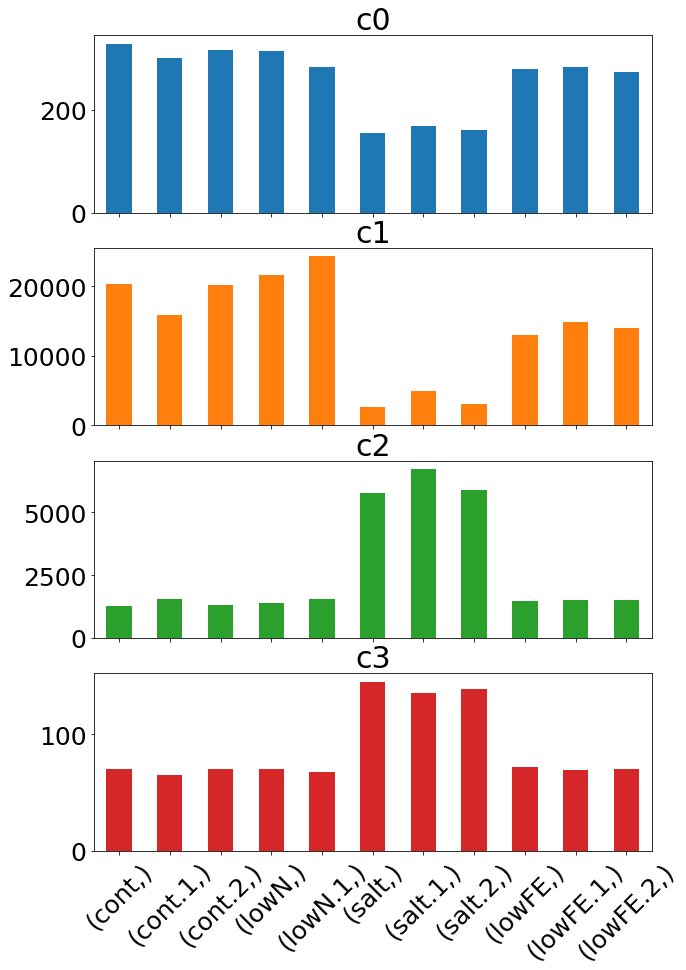

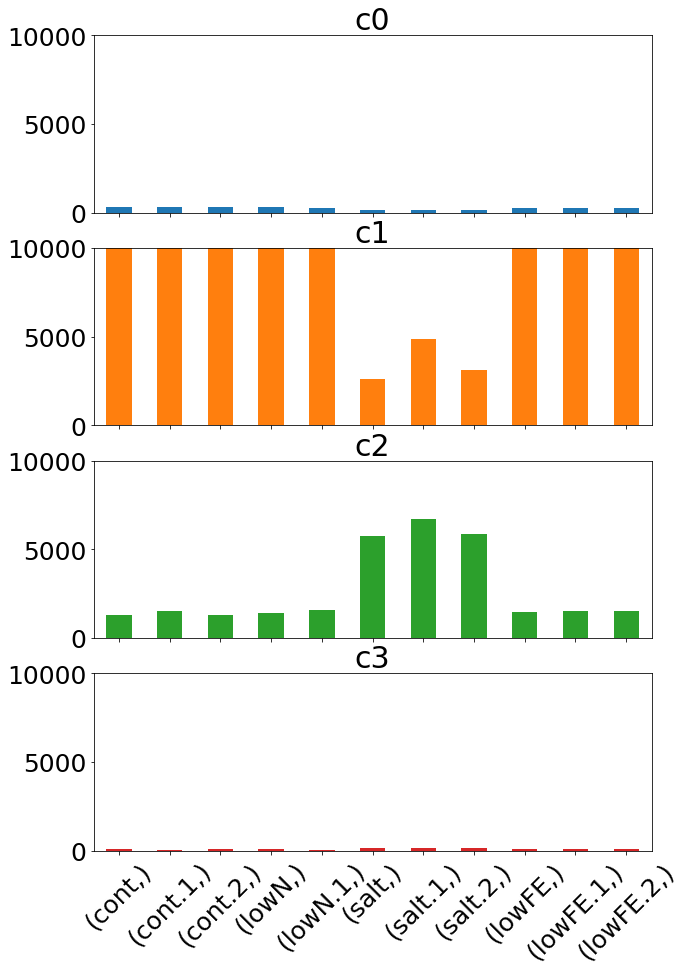

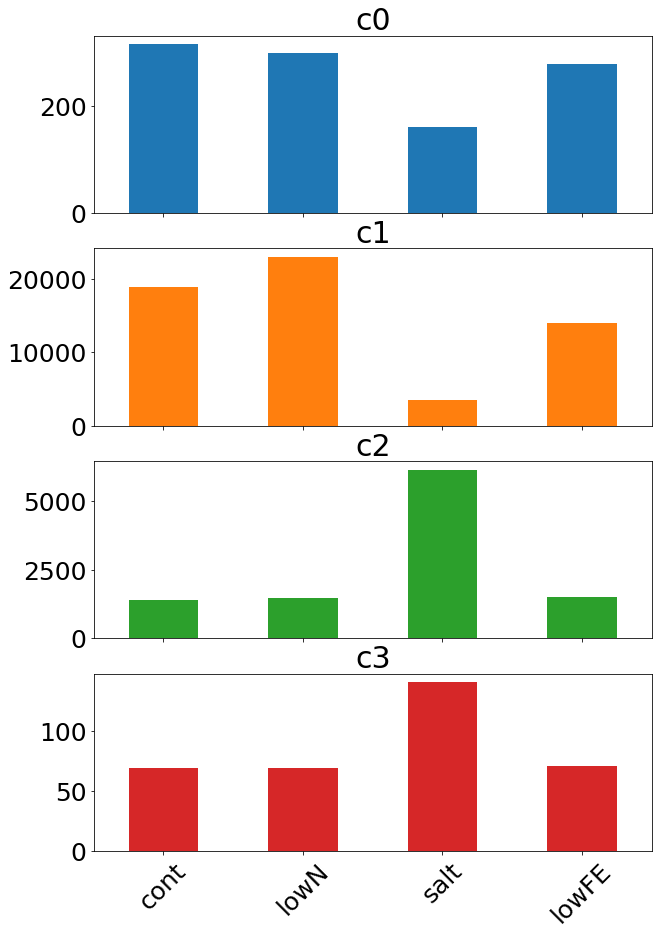

In [29]:
dh_mean_t = np.transpose(dh_mean)
ax = dh_mean_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_mean_4_axis_bar.pdf')

ax = dh_mean_t.plot.bar(rot=45, subplots = True, ylim=(0,10000), figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_mean_4_bar.pdf')

dh_mean_collapsedreps_t = np.transpose(dh_mean_collapsedreps)
ax = dh_mean_collapsedreps_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=0.1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('dh_mean_4_collapsedreps_bar.pdf')